<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-valeriaarh/blob/main/Reduccion_dimensiones_A01240716.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actividad Semanal 6 -- 5 Repaso Transformación y reducción de dimensiones**

Ciencia y Analítica de datos

Alumna: Valeria Alejandra Ramirez Herrera

Matrícula: A01240716

Profesor: Dr. Jobish Vallikavungal / Dr. María de la Paz Rico

Fecha: 27/Octubre/2022

# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y Reconstrucción
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




In [1]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
from numpy.linalg import inv

# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")

# calcula la eigendescomposicion
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción

values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#TU CODIGO AQUI-------------------------------------
B = np.dot(np.dot(W,D),Winv)
print(B)
print("-----------------------------")

#Como se puede ver, queda la misma matriz en A y en B


-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----------------------------


In [2]:
#Matriz 1

#Definición de la matriz
A1=array([[3,0,2],[3,0,-2],[0,1,1]])

print('Matriz A1 original')
print(A1)

#Valores eigendescomposición

values1, vectors1 = eig(A1)

print('Valores/Vectores')
print(values1)
print(vectors1)

#Reconstrucción
values1, vectors1 = np.linalg.eig(A1)

W1 = vectors1.round(2)
W1_inv = np.linalg.inv(W1)
D1 = np.diag(values1)

WD1 = np.dot(W1,D1)

A_rec= np.dot(WD1,W1_inv).round(2)

print('Matriz A1 reconstruida')
print(A_rec)


Matriz A1 original
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
Valores/Vectores
[3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]
Matriz A1 reconstruida
[[ 2.98+0.j  0.01-0.j  2.02+0.j]
 [ 3.01-0.j  0.01+0.j -1.97-0.j]
 [-0.  +0.j  1.  -0.j  1.  -0.j]]


In [3]:
#Matriz 2
#Definición de la matriz
A2=array([[1,3,8],[2,0,0],[0,0,1]])

print('Matriz A2 original')
print(A2)

#Valores eigendescomposición

values2, vectors2 = eig(A2)

print('Valores/Vectores')
print(values2)
print(vectors2)

#Reconstrucción
values2, vectors2 = np.linalg.eig(A2)

W2 = vectors2.round(2)
W2_inv = np.linalg.inv(W2)
D2 = np.diag(values2)

WD2 = np.dot(W2,D2)

A2_rec= np.dot(WD2,W2_inv).round(2)

print('Matriz A2 reconstruida')
print(A2_rec)


Matriz A2 original
[[1 3 8]
 [2 0 0]
 [0 0 1]]
Valores/Vectores
[ 3. -2.  1.]
[[ 0.83205029 -0.70710678 -0.42399915]
 [ 0.5547002   0.70710678 -0.8479983 ]
 [ 0.          0.          0.31799936]]
Matriz A2 reconstruida
[[ 1.01  3.01  8.  ]
 [ 1.99 -0.01 -0.06]
 [ 0.    0.    1.  ]]


In [4]:
#Matriz 3
#Definición de la matriz
A3=array([[5,4,0],[1,0,1],[10,7,1]])

print('Matriz A3 original')
print(A3)

#Valores eigendescomposición

values3, vectors3 = eig(A3)

print('Valores/Vectores')
print(values3)
print(vectors3)

#Reconstrucción
values3, vectors3 = np.linalg.eig(A3)

W3 = vectors3.round(2)
W3_inv = np.linalg.inv(W3)
D3 = np.diag(values3)

WD3 = np.dot(W3,D3)

A3_rec= np.dot(WD3,W3_inv).round(2)

print('Matriz A3 reconstruida')
print(A3_rec)

Matriz A3 original
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
Valores/Vectores
[ 6.89167094 -0.214175   -0.67749594]
[[ 0.3975395   0.55738222  0.57580768]
 [ 0.18800348 -0.72657211 -0.81728644]
 [ 0.89811861 -0.40176864 -0.02209943]]
Matriz A3 reconstruida
[[ 5.03  4.04 -0.03]
 [ 1.01  0.02  1.  ]
 [10.02  7.05  0.95]]


**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


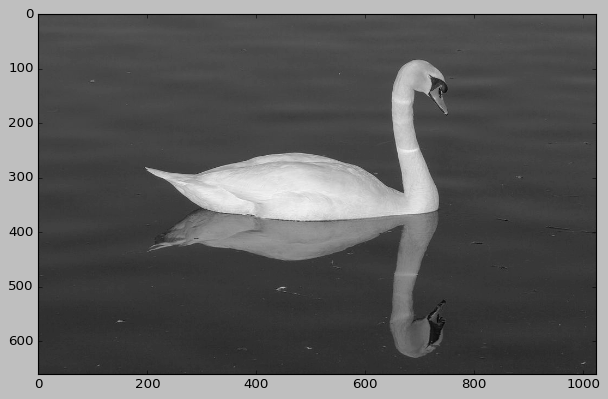

In [5]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [6]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


<PIL.Image.Image image mode=LA size=1024x660 at 0x7F872D0B74D0>


(660, 1024)

In [7]:
U.shape

(660, 660)

In [8]:
V.shape

(1024, 1024)

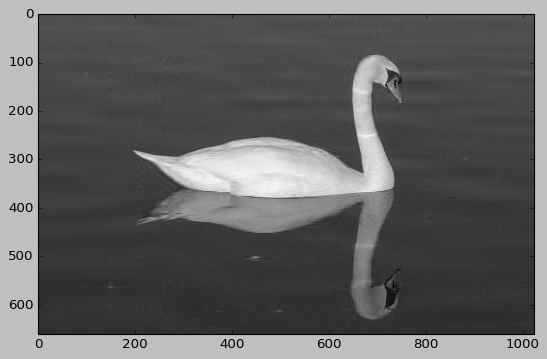

Felicidades la imagen está comprimida


In [9]:
#Cuantos valores crees que son necesarios
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50

#Con valor menor a 50, Lucy se distorciona mucho

#Aumentanto 
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!
Comprime 3 imagenes

[151. 151. 151. ...  67.  67.  70.]


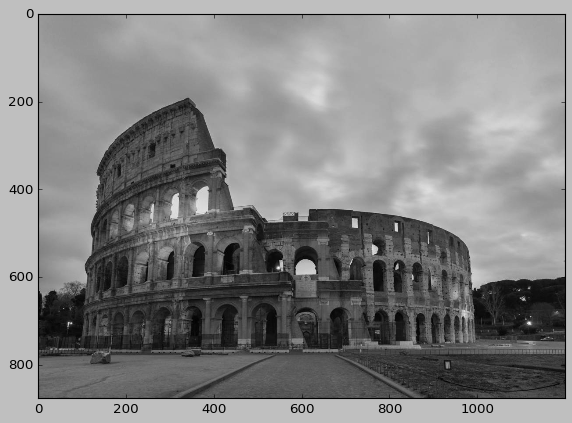

<PIL.Image.Image image mode=LA size=1200x875 at 0x7F8728B8C190>


In [10]:
#imagen 1

plt.style.use('classic')
img1 = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2022/06/coliseo-roma.jpg')).convert('LA')
imggray1 = img1.convert('LA')
imgmat1 = np.array(list(imggray1.getdata(band=0)),float)

print(imgmat1)

imgmat1.shape = (imggray1.size[1],imggray1.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat1,cmap='gray')
plt.show()
print(img1)

In [11]:
J,K,L = np.linalg.svd(imgmat1)
print(imgmat1.shape)

print(J.shape)
print(K.shape)
print(L.shape)

(875, 1200)
(875, 875)
(875,)
(1200, 1200)


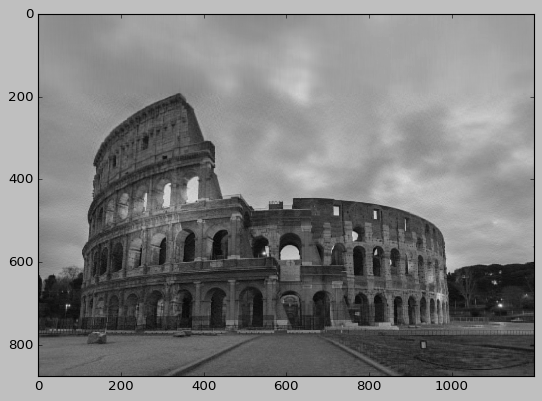

Felicidades la imagen está comprimida


In [12]:
##Los valores van de 0-875

nvalue1 = 120

#A partir del valor 120 se empieza a ver mejor la imagen, con valores menores
#se ve distorcionada la parte de arriba del Coliseo

#Aumentanto 
#------------------------------
reconstimg1 = np.matrix(J[:,:nvalue1])*np.diag(K[:nvalue1])*np.matrix(L[:nvalue1,:])
#ve las dimensiones de la imagen y su descomposicion
#875x1200= J(875x1200)K(875)L(1200x1200)
        #=J(875Xnvalue2)K(nvalue2Xnvalue2)L(nvalue2x1200)

      
plt.imshow(reconstimg1,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

[244. 244. 244. ...  28.  28.  28.]


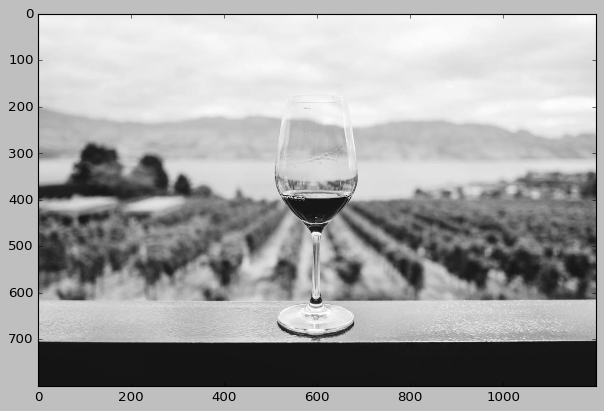

<PIL.Image.Image image mode=LA size=1200x800 at 0x7F8728B8C810>


In [13]:
#imagen 2

plt.style.use('classic')
img2 = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2022/09/vino.jpg')).convert('LA')
imggray2 = img2.convert('LA')
imgmat2 = np.array(list(imggray2.getdata(band=0)),float)

print(imgmat2)

imgmat2.shape = (imggray2.size[1],imggray2.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat2,cmap='gray')
plt.show()
print(img2)

In [14]:
O,P,Q = np.linalg.svd(imgmat2)
print(imgmat2.shape)

print(O.shape)
print(P.shape)
print(Q.shape)

(800, 1200)
(800, 800)
(800,)
(1200, 1200)


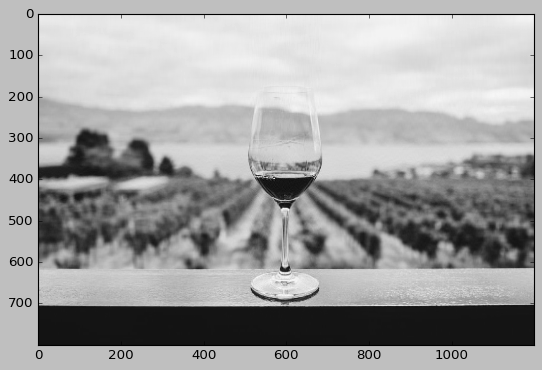

Felicidades la imagen está comprimida


In [15]:
##Los valores van de 0-800

nvalue2 = 100

#A partir del valor 100 se empieza a ver mejor la imagen, con valores menores
#se ve distorcionada la parte de la copa

#Aumentanto 
#------------------------------
reconstimg2 = np.matrix(O[:,:nvalue2])*np.diag(P[:nvalue2])*np.matrix(Q[:nvalue2,:])
#ve las dimensiones de la imagen y su descomposicion
#800X1200= O(800x800)P(800)Q(1200x1200)
        #=O(800Xnvalue2)P(nvalue2Xnvalue2)Q(nvalue2x1200)

      
plt.imshow(reconstimg2,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

[144. 140. 139. ... 112. 147.  89.]


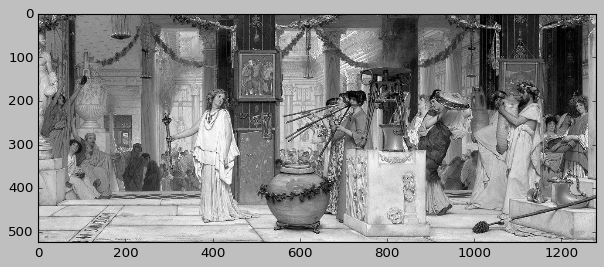

<PIL.Image.Image image mode=LA size=1280x523 at 0x7F8728B65F50>


In [16]:
#imagen 3

plt.style.use('classic')
img3 = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2022/06/Lawrence_Alma-Tadema_-_The_vintage_festival.jpg')).convert('LA')
imggray3 = img3.convert('LA')
imgmat3 = np.array(list(imggray3.getdata(band=0)),float)

print(imgmat3)

imgmat3.shape = (imggray3.size[1],imggray3.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat3,cmap='gray')
plt.show()
print(img3)

In [17]:
X,Y,Z = np.linalg.svd(imgmat3)
print(imgmat3.shape)

print(X.shape)
print(Y.shape)
print(Z.shape)

(523, 1280)
(523, 523)
(523,)
(1280, 1280)


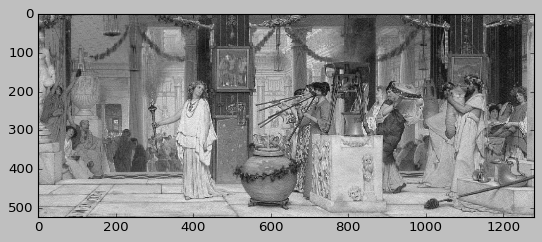

Felicidades la imagen está comprimida


In [18]:
##Los valores van de 0-523

nvalue3 = 150

#A partir del valor 150 se empieza a ver mejor la imagen, con valores menores
#se ve distorcionada la parte derecha de la imagen

#Aumentanto 
#------------------------------
reconstimg3 = np.matrix(X[:,:nvalue3])*np.diag(Y[:nvalue3])*np.matrix(Z[:nvalue3,:])
#ve las dimensiones de la imagen y su descomposicion
#523x1280= X(523,523)Y(523)Z(1280x1280)
        #=X(523Xnvalue3)Y(nvalue2Xnvalue3)Z(nvalue2x1280)

      
plt.imshow(reconstimg3,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

En conclusión para este ejercicio se me hizo interesante cómo la compresión de imágenes nos puede dar buenos resultados aún cuando se hace la reducción de datos, la clave fue jugar con los valores para que la imagen siguiera teniendo calidad.

En general el SVD - Single Value Decomposition - nos permite descomponer una matriz en varias matrices y extraer la información o propiedades de cada una de ellas para entender la matriz original y lograr simplificarla y/o bajarla de rango. En este caso se hizo justo eso con las imágenes que trabajamos.


- Chengwang, L. (2010). Active Geophysical Monitoring. Retrieved from Science Direct: https://www.sciencedirect.com/topics/engineering/singular-value-decomposition

# Ejercicio 3

**Feature importances o importancia de las variables o características.**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e


Danos tus comentarios acerca de lo más relevante del ejercicio y que descubriste de las variables análizadas. Adjunta tu notebook y el link. 

In [20]:
#tu codigo aqui
#Importación de librerías

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')
# Load the data
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Z-score the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# The PCA model
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space

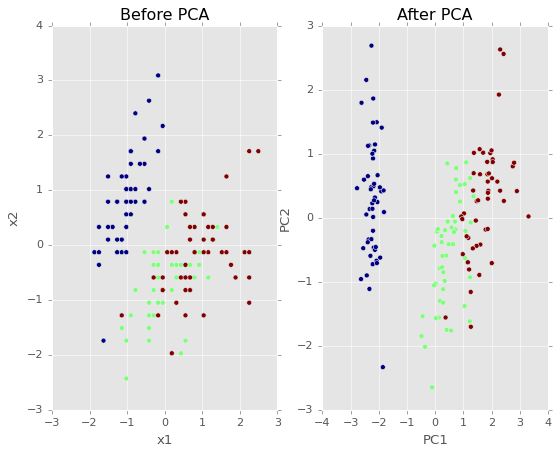

In [21]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

#Se puede ver en la gráfica que la varianza se maximiza 
#a lo largo del eje X

In [22]:
print(pca.explained_variance_ratio_)

#El total de la varianza entre los dos componentes principales calculados 
#dan alrededor de 0.95 de la información almacenada, lo que significa que 
#hay alrededor de 0.5 de datos que no se están usando.

[0.72962445 0.22850762]


In [23]:
np.cov(X_new.T) #Se calcula la covarianza

array([[2.93808505e+00, 5.33928780e-16],
       [5.33928780e-16, 9.20164904e-01]])

In [24]:
pca.explained_variance_ #Para la prueba de varianza máximasSe toman los valores en diagonal 
# de la función anterior 

array([2.93808505, 0.9201649 ])

In [25]:
print(abs( pca.components_ ))
#Aquí se imprimen los valores para los dos componentes principales
#el primer renglón se refieren a los valores del PC1
#mientras que el segundo renglón son los valores de PC2

#Para el PC1 sus valores más importantes son 1, 3 y 4, ya que son los valores mayores
#y para PC2 son los valores 1 y 2

[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


In [26]:
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

    #Con la función de biplot se hará la visualización 
    #de toda la información de PCA, no hay una forma estándar
    #en Python así que se define la función.

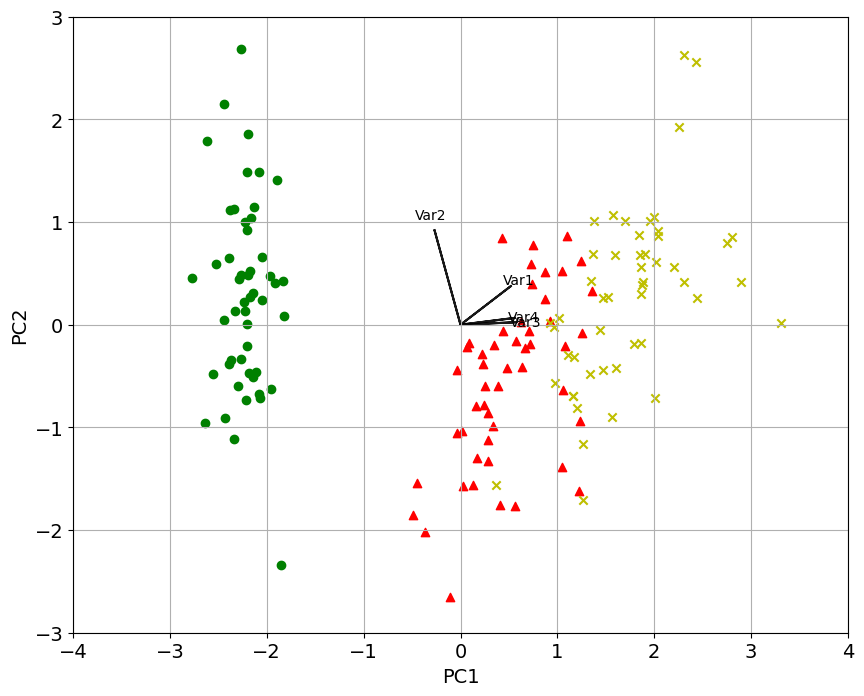

In [27]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

#Se manda llamar la función y la librería adecuada para
#que se carguen los datos originales y los resultado 
# de PCA

In [28]:
# Para PC1, se puede ver que las variables 3 y 4 están extremadamente correlacionadas
print(np.corrcoef(X[:,2], X[:,3])[1,0])

#Mientras las variables 2 y 3, no tienen nada en relación ya que su hasta su
#correlación es negativa
print(np.corrcoef(X[:,1], X[:,2])[1,0])


#estos mismos resultado se pueden ver en la gráfica anterior donde las variables
#3 y 4 están casi juntas, confirmando su correlación,
#mientras que variables 2 y 3 están muy alejadas una de la otra.

0.9628654314027957
-0.42844010433054014


**Preguntas**

- **¿Qué es feature importance y para que nos sirve?**

El feature importance es una técnica que asignan una puntiación a las características de entrada para ver su utilidad al omento de predecir una variable de salida.

Juega un papel importante en proyectos de modelado predictivo ya que con el trabajo interno que se hace como reducción de dimencionalidad y selección de features se puede mejorar la eficiencia y efectividad del modelo.

- **¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?**

Uno de los hallazgos que me parecieron interesantes fue lo de la varianza maximizada, ya que se pudo ver que la suma de los 2 componentes principales mantenían el 95% de los datos originales, lo ideal debería ser el 100% pero aún así se mantiene un buen porcentaje.

Y pues el cómo al final la correlación de las variables entre ellas para cada uno de los componentes principales y que no necesariamente todas deban de ser de valor.


- **¿Dónde lo aplicarías o te sería de utilidad este conocimiento?**

Una de las aplicaciones que se me vienen a la mente es con la introducción de Big Data, ya que al recibir una gran cantidad de datos, PCA podría ser de utilidad para reducir la dimensionalidad de los mismo y dejar las variables que sean relevantes.

Otras de las utilidades mencionadas en la página dada:

- Procesamiento de datos donde existe la multicolineadidad entre las características y las variables.
- Eliminación de ruido y compresión de datos.

**Referencias**

- Chengwang, L. (2010). Active Geophysical Monitoring. Retrieved from Science Direct: https://www.sciencedirect.com/topics/engineering/singular-value-decomposition
- Brownlee, J. (2020, August 20). How to Calculate Feature Importance With Python . Retrieved from Machine Learning Mastery: https://machinelearningmastery.com/calculate-feature-importance-with-python/
- Amat, J. (2017, June). Análisis de Componentes Principales (Principal Component Analysis, PCA) y t-SNE. Retrieved from Ciencia de Datos: https://www.cienciadedatos.net/documentos/35_principal_component_analysis
- Serafeim, L. (2020, May 30). PCA clearly explained —When, Why, How to use it and feature importance: A guide in Python. Retrieved from Towards Data Science: https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e